In [22]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/87?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 3416
Some examples: [('冬瓜', '干貝'), ('冬瓜', '香菇'), ('冬瓜', '薑'), ('干貝', '香菇'), ('干貝', '薑'), ('香菇', '薑')]


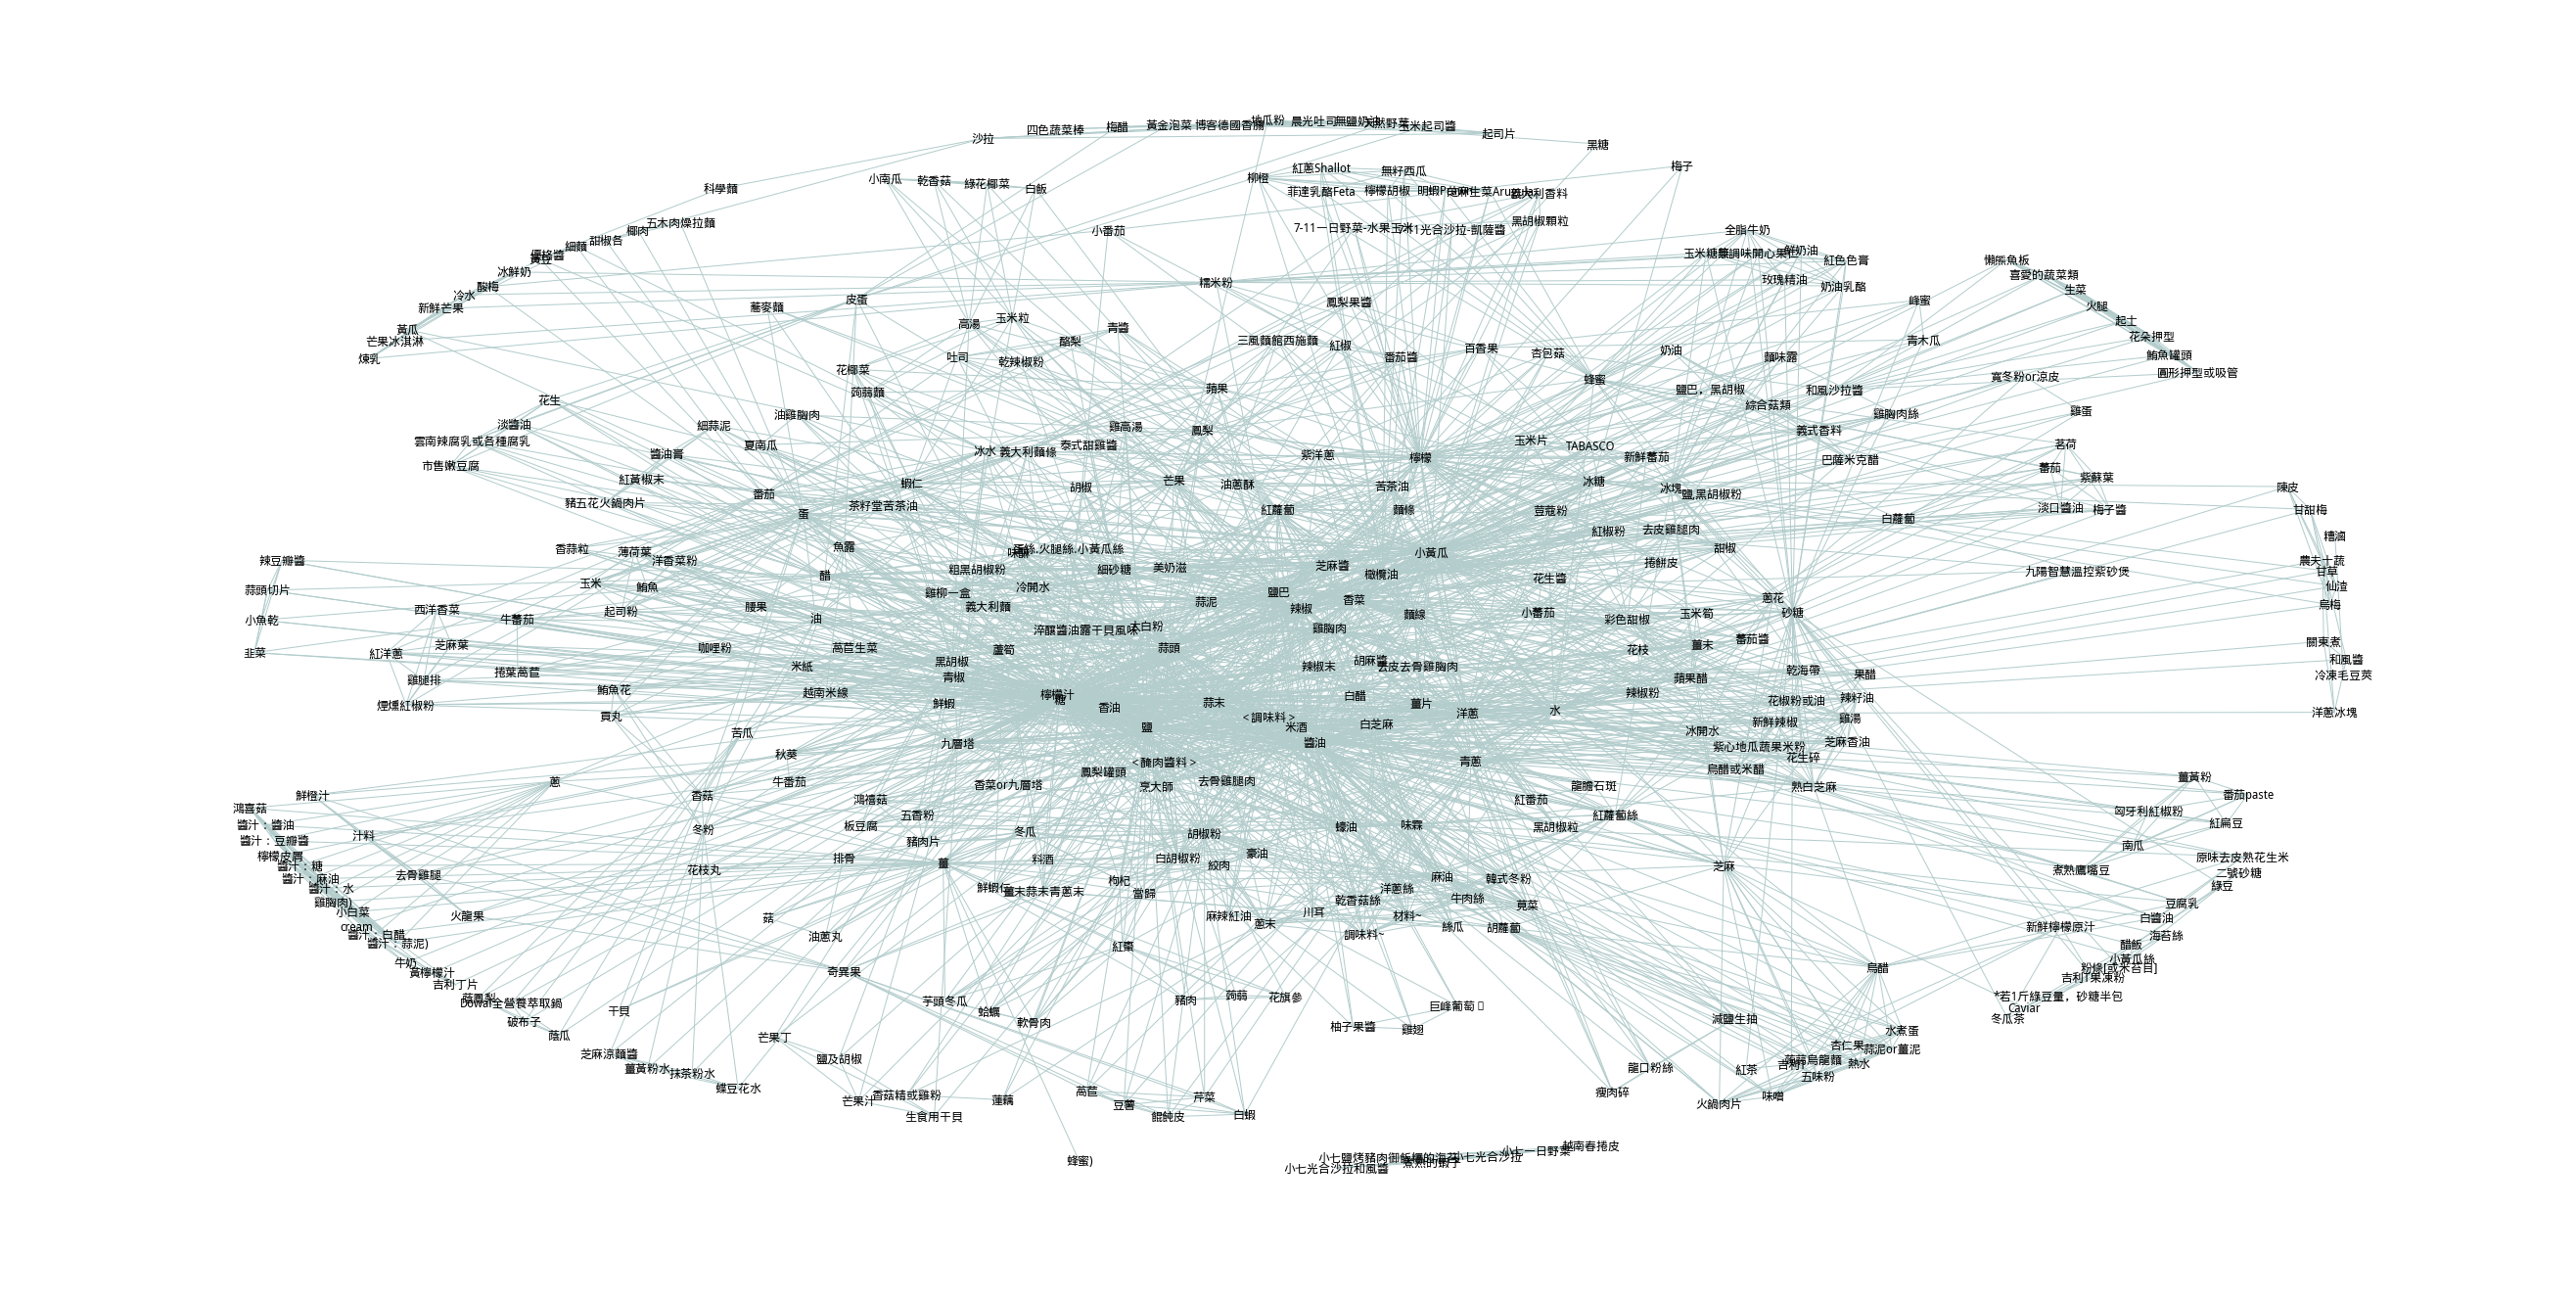

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('summer_recipe.png', dpi=100)

In [24]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('鹽', 134), ('糖', 133), ('醬油', 108), ('小黃瓜', 103), ('米酒', 80), ('洋蔥', 80), ('蒜頭', 76), ('蒜末', 71), ('檸檬汁', 70), ('檸檬', 68), ('辣椒', 68), ('橄欖油', 65), ('鹽巴', 62), ('香菜', 58), ('香油', 56)]

Closeness centrality: [('糖', 0.5666869591685871), ('鹽', 0.5629951874476192), ('醬油', 0.5495692290824137), ('小黃瓜', 0.5376034915907282), ('米酒', 0.5237561289285427), ('蒜頭', 0.5098510989569885), ('鹽巴', 0.4995361923306911), ('檸檬汁', 0.49595271892803183), ('洋蔥', 0.4952421849467596), ('蒜末', 0.4938272072754831), ('檸檬', 0.4931227462094696), ('橄欖油', 0.49102137087050884), ('香菜', 0.4896303754856065), ('辣椒', 0.4882472388316924), ('水', 0.48414432085831677)]

Degree centrality: [('鹽', 0.35543766578249336), ('糖', 0.35278514588859416), ('醬油', 0.286472148541114), ('小黃瓜', 0.27320954907161804), ('米酒', 0.21220159151193632), ('洋蔥', 0.21220159151193632), ('蒜頭', 0.2015915119363395), ('蒜末', 0.1883289124668435), ('檸檬汁', 0.1856763925729443), ('檸檬', 0.18037135278514588), ('辣椒', 0.18037135278514588), ('橄欖油', 0.17241379310344

In [25]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 71253.0
Total edges in the graph: 2668
Density: 0.0374

Name: 
Type: Graph
Number of nodes: 378
Number of edges: 2668
Average degree:  14.1164


In [32]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 2779
[(('冬瓜', '薑'), 8), (('薑', '鹽'), 8), (('米酒', '糖'), 6), (('小黃瓜', '糖'), 6), (('醬油', '糖'), 6), (('鳳梨', '檸檬'), 5), (('鹽', '糖'), 5), (('檸檬', '百香果'), 5), (('米酒', '檸檬汁'), 4), (('薑片', '米酒'), 4), (('洋蔥', '鹽'), 4), (('小黃瓜', '鹽'), 4), (('冰糖', '檸檬'), 4), (('冬瓜', '鹽'), 4), (('紅棗', '鹽'), 4)]


In [30]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

134


In [31]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.3197
